In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df.duplicated().sum()

2700

In [6]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   71655 non-null  int64 
 1   Borderlands                                            71655 non-null  object
 2   Positive                                               71655 non-null  object
 3   im getting on borderlands and i will murder you all ,  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [8]:
# Rename the fourth column to 'Tweet' for clarity
df.columns = ['id', 'Entity', 'Sentiment', 'Tweet']
print(df.columns)

Index(['id', 'Entity', 'Sentiment', 'Tweet'], dtype='object')


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):  # 🔐 Skip non-string values
        return ""
    
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    text = " ".join(
        [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    )
    return text

   

df['clean_text'] = df['Tweet'].apply(clean_text)
df[['Tweet', 'clean_text']].head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweet,clean_text
0,I am coming to the borders and I will kill you...,coming border kill
1,im getting on borderlands and i will kill you ...,im getting borderland kill
2,im coming on borderlands and i will murder you...,im coming borderland murder
3,im getting on borderlands 2 and i will murder ...,im getting borderland 2 murder
4,im getting into borderlands and i can murder y...,im getting borderland murder


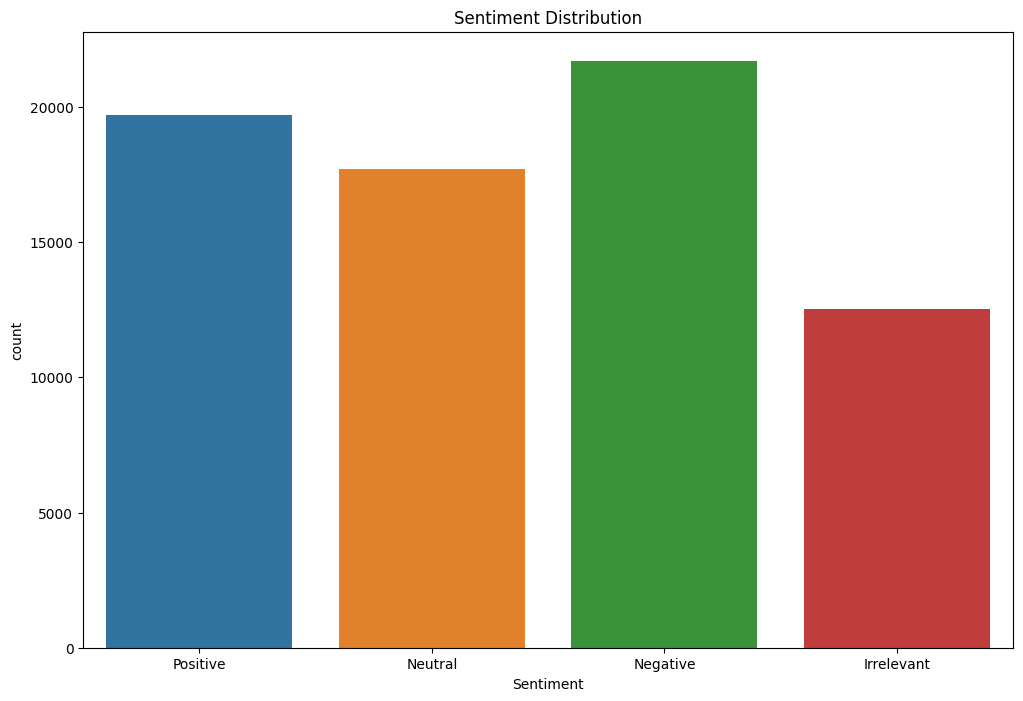

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

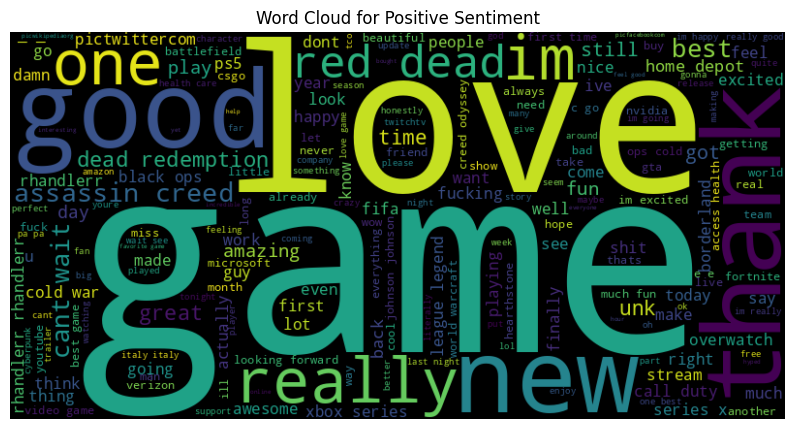

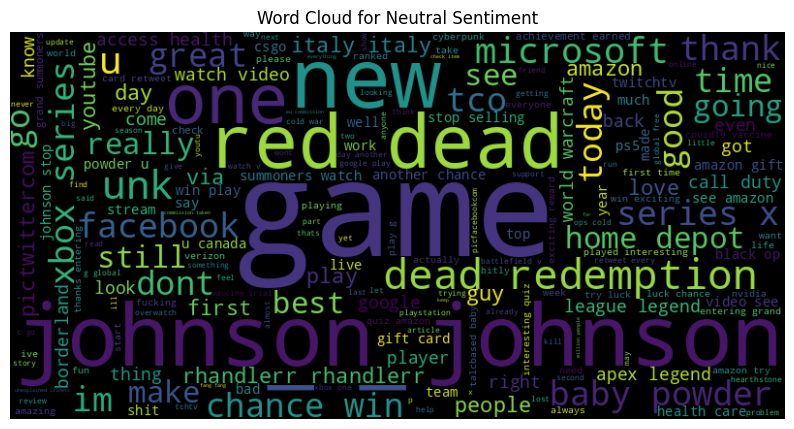

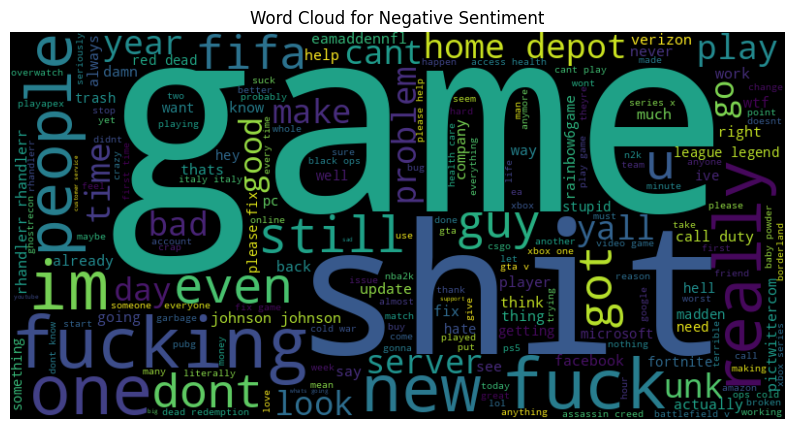

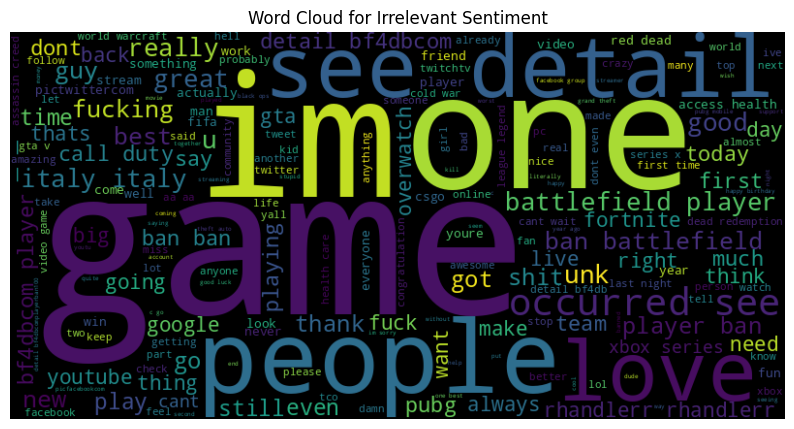

In [11]:
from wordcloud import WordCloud

for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Sentiment']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1260  434  289  472]
 [ 184 3511  357  381]
 [ 243  601 2187  501]
 [ 208  516  391 2796]]
              precision    recall  f1-score   support

  Irrelevant       0.66      0.51      0.58      2455
    Negative       0.69      0.79      0.74      4433
     Neutral       0.68      0.62      0.65      3532
    Positive       0.67      0.71      0.69      3911

    accuracy                           0.68     14331
   macro avg       0.68      0.66      0.66     14331
weighted avg       0.68      0.68      0.68     14331



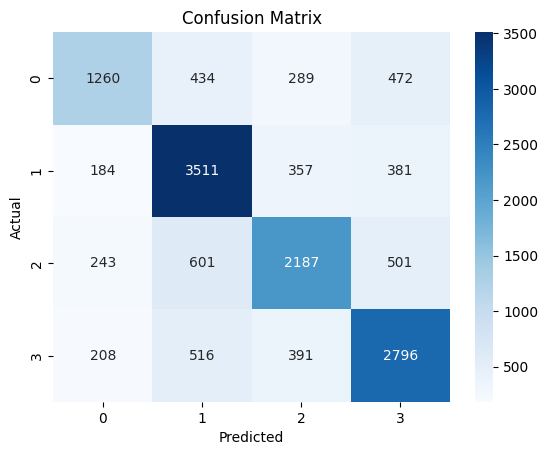

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

  Irrelevant       0.93      0.80      0.86      2455
    Negative       0.90      0.90      0.90      4433
     Neutral       0.89      0.85      0.87      3532
    Positive       0.81      0.91      0.86      3911

    accuracy                           0.87     14331
   macro avg       0.88      0.87      0.87     14331
weighted avg       0.88      0.87      0.87     14331



In [16]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)


print(classification_report(y_test_labels, y_pred_labels))


              precision    recall  f1-score   support

  Irrelevant       0.73      0.35      0.47      2455
    Negative       0.58      0.83      0.69      4433
     Neutral       0.68      0.53      0.60      3532
    Positive       0.64      0.66      0.65      3911

    accuracy                           0.63     14331
   macro avg       0.66      0.59      0.60     14331
weighted avg       0.65      0.63      0.62     14331



In [17]:
!pip install transformers datasets --quiet
!pip install accelerate --upgrade --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.8.4.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cufft-cu12==11.2.1.3; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cufft-cu12 11.3.3.83 which is incompatible.
torch 2.5.1+cu124 requires nvidia-curand-cu12==10.3.5.147; platform_system == "Linux" and platform_machin

In [18]:
import torch 
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset


2025-04-22 12:53:26.715384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745326406.945489      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745326407.014837      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
import joblib

joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [20]:
joblib.dump(model, "sentiment_model.pkl")

['sentiment_model.pkl']